First, load the data, from the supplied data file

In [36]:
import pandas as pd
data = pd.read_csv("restaurant_data.csv")
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


# Cleaning

The data had some some strange things in. Write down all of the strange things that you found here:

### I found the following strange things:
* There were extreme values in the `total_bill` and `tip` columns. `total_bill` had a maximum value of 9999, which is highly unusual for a restaurant bill.

* Similarly, tip had a maximum value of 9999, which is clearly unrealistic.

* There were negative values for both `total_bill` and `tip`, such as -20.76 for `total_bill` and -2.24 for `tip`. These are nonsensical, as bills and tips should not be negative.

* The day names in the `day` column are not standardised or consitent. For example, "Thur" vs. "Thursday"

* The `sex` column has inconsistent labels. There are both Female/Male values as well as Lady/Man. 

Now, clean the data. Use a separate cell for each operation, and use a text cell to explain _why_ you are doing each operation

First, I am removing all negative values from the `total_bill` and `tip` columns. This is because a bill or tip cannot be negative in a restaurant context.

In [37]:
# Cleaning code goes in here
# Removing rows with negative values in total_bill and tip
restaurant_data_df = pd.read_csv('restaurant_data.csv')
restaurant_data_cleaned = restaurant_data_df[
    (restaurant_data_df['total_bill'] > 0) & (restaurant_data_df['tip'] > 0)
]

Next, I am removing any rows where `total_bill` exceeds £500 or `tip` exceeds £100. These values are extreme outliers, as typical restaurant bills and tips do not reach these amounts.

In [38]:
# More cleaning code goes in here
# Removing rows with extreme outliers in total_bill and tip
restaurant_data_cleaned = restaurant_data_cleaned[
    (restaurant_data_cleaned['total_bill'] < 500) & (restaurant_data_cleaned['tip'] < 100)
]

Now, I am checking for any missing values in the dataset, as missing data can lead to incorrect analysis.

In [39]:
# Checking for missing values
missing_values = restaurant_data_cleaned.isnull().sum()
print(missing_values)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


I am checking for duplicate rows in the dataset. Duplicate rows could skew the analysis and should be removed.

In [40]:
# Checking for duplicate rows in the dataset
duplicate_rows = restaurant_data_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Removing duplicate rows if any
restaurant_data_cleaned = restaurant_data_cleaned.drop_duplicates()


Number of duplicate rows: 1


Now, I am checking the `size` column to ensure that the group sizes are reasonable (e.g, no group sizes of 0 or unrealistically large values).

In [41]:
# Checking for unrealistic group sizes
print(restaurant_data_cleaned['size'].describe())

# Removing rows where the size is unrealistic (e.g, size less than 1 or greater than a reasonable upper limit, like 20)
restaurant_data_cleaned = restaurant_data_cleaned[(restaurant_data_cleaned['size'] >= 1) & (restaurant_data_cleaned['size'] <= 20)]


count    241.000000
mean       2.576763
std        0.954878
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        6.000000
Name: size, dtype: float64


I am cleaning and standardising the values in the `day` column to ensure consistency across all day names. This is because inconsistent or misspelled day names (like "Thur" vs. "Thursday") can lead to issues in visualisations.

In [42]:
# Cleaning the 'day' column to ensure consistency

restaurant_data_cleaned['day'] = restaurant_data_cleaned['day'].str.strip().replace({
    'Thur': 'Thu', 
    'Thursday': 'Thu', 
    'Fri': 'Fri', 
    'Saturday': 'Sat', 
    'Sunday': 'Sun'
})

I am cleaning the `sex` column by replacing any inconsistent labels like "Lady" with "Female" and "Man" with "Male".

In [43]:
# Cleaning the 'sex' column to ensure it only contains 'Male' and 'Female'
# I am replacing 'Lady' with 'Female' and 'Man' with 'Male' for consistency.

restaurant_data_cleaned['sex'] = restaurant_data_cleaned['sex'].str.strip().replace({
    'Lady': 'Female', 
    'Man': 'Male'
})

I am verifying that the values in categorical columns (`sex`, `smoker`, `day`, and `time`) are consistent, and there are no misspellings or unusual entries.

In [44]:
# Checking for unique values in categorical columns to ensure consistency
print("Unique values in 'sex' column:", restaurant_data_cleaned['sex'].unique())
print("Unique values in 'smoker' column:", restaurant_data_cleaned['smoker'].unique())
print("Unique values in 'day' column:", restaurant_data_cleaned['day'].unique())
print("Unique values in 'time' column:", restaurant_data_cleaned['time'].unique())

Unique values in 'sex' column: ['Female' 'Male']
Unique values in 'smoker' column: ['No' 'Yes']
Unique values in 'day' column: ['Sun' 'Sat' 'Thu' 'Fri']
Unique values in 'time' column: ['Dinner' 'Lunch']


Now that your data is clean, use some assert statements to check that it fits your picture of how the data should be. Make sure each assert explains why it is there. You should have several asserts, for all of the things that you found in the data that were strange.

In [45]:
# Assert to check that total_bill and tip are always positive
assert (restaurant_data_cleaned['total_bill'] > 0).all(), "There should be no negative values in total_bill"
assert (restaurant_data_cleaned['tip'] > 0).all(), "There should be no negative values in tip"

# Assert to check that total_bill and tip are within reasonable limits
assert (restaurant_data_cleaned['total_bill'] < 500).all(), "total_bill should not exceed £500"
assert (restaurant_data_cleaned['tip'] < 100).all(), "tip should not exceed £100"

# Assert to check there are no missing values in critical columns
assert restaurant_data_cleaned[['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']].notnull().all().all(), "There should be no missing values in key columns"

# Assert to check that there are no duplicate rows
assert restaurant_data_cleaned.duplicated().sum() == 0, "There should be no duplicate rows in the cleaned data"

# Assert to check that party sizes are between 1 and 20
assert (restaurant_data_cleaned['size'] >= 1).all(), "Party size should be at least 1"
assert (restaurant_data_cleaned['size'] <= 20).all(), "Party size should not exceed 20"

# Assert to check that 'sex' column only contains 'Male' and 'Female'
assert set(restaurant_data_cleaned['sex'].unique()).issubset({'Male', 'Female'}), "The 'sex' column should only contain 'Male' and 'Female'"

# Assert to check that 'smoker' column only contains 'Yes' and 'No'
assert set(restaurant_data_cleaned['smoker'].unique()).issubset({'Yes', 'No'}), "The 'smoker' column should only contain 'Yes' and 'No'"

# Assert to check that 'day' column contains only expected days
assert set(restaurant_data_cleaned['day'].unique()).issubset({'Thu', 'Fri', 'Sat', 'Sun'}), "The 'day' column should only contain valid day names"

# Assert to check that 'time' column only contains 'Lunch' and 'Dinner'
assert set(restaurant_data_cleaned['time'].unique()).issubset({'Lunch', 'Dinner'}), "The 'time' column should only contain 'Lunch' and 'Dinner'"


# Simple Statistical Questions
For each of these, we want a command that just prints the relevant answer. The first one has been filled out as an example


How many rows are in the dataset after cleaning?

In [46]:
restaurant_data_cleaned.shape[0] # Simply count the number of rows using shape, and select the first element

241

What is the total amount of tips given?

In [47]:
# Calculate the total amount of tips
total_tips = restaurant_data_cleaned['tip'].sum()
print(total_tips)


725.3399999999999


What is the largest group?

In [48]:
# Find the largest group (maximum party size)
largest_group = restaurant_data_cleaned['size'].max()
print(largest_group)


6


How many bills were paid by males, and how many by females?

In [49]:
# Count the number of bills paid by males and females
bills_by_gender = restaurant_data_cleaned['sex'].value_counts()
print(bills_by_gender)


sex
Male      155
Female     86
Name: count, dtype: int64


What is the average percentage of the bill that people add as a tip?

In [50]:
# Calculate the average percentage of the bill that people add as a tip
average_tip_percentage = (restaurant_data_cleaned['tip'] / restaurant_data_cleaned['total_bill'] * 100).mean()
print(average_tip_percentage)


16.119951858557354


What is the largest tip?

In [51]:
# Find the largest tip
largest_tip = restaurant_data_cleaned['tip'].max()
print(largest_tip)


10.0


What day of the week was the largest tip given on?

In [52]:
# Find the day of the week when the largest tip was given
day_largest_tip = restaurant_data_cleaned.loc[restaurant_data_cleaned['tip'].idxmax(), 'day']
print(day_largest_tip)


Sat


Do males or females give more tips as an average of the bill? What is the difference?

In [69]:
# Calculate the tip percentage for each row using .loc[] to avoid the SettingWithCopyWarning
restaurant_data_cleaned.loc[:, 'tip_percentage'] = restaurant_data_cleaned['tip'] / restaurant_data_cleaned['total_bill'] * 100

# Calculate the average tip percentage by gender using transform
average_tip_percentage_by_gender = restaurant_data_cleaned.groupby('sex')['tip_percentage'].mean()
print(average_tip_percentage_by_gender)

# Calculate the difference in tip percentage between males and females
tip_difference = average_tip_percentage_by_gender['Male'] - average_tip_percentage_by_gender['Female']
print(tip_difference)


sex
Female    16.373483
Lady      17.332538
Male      15.677949
Man       16.104253
Name: tip_percentage, dtype: float64
-0.6955338059993803


Do smokers tip more at lunchtime than at dinnertime?

In [54]:
# Calculate the average tip for smokers at lunchtime and dinnertime
average_tip_by_time = restaurant_data_cleaned[restaurant_data_cleaned['smoker'] == 'Yes'].groupby('time')['tip'].mean()
print(average_tip_by_time)

# Check if smokers tip more at lunchtime than dinnertime
smokers_tip_difference = average_tip_by_time['Lunch'] - average_tip_by_time['Dinner']
print(smokers_tip_difference)


time
Dinner    3.06600
Lunch     2.91381
Name: tip, dtype: float64
-0.15219047619047643


# Graphs
For all these questions, use a graph to illustrate your answer

What is the distribution of tips, and what is the distribution of total bills (plot on separate graphs). Hint: distplot

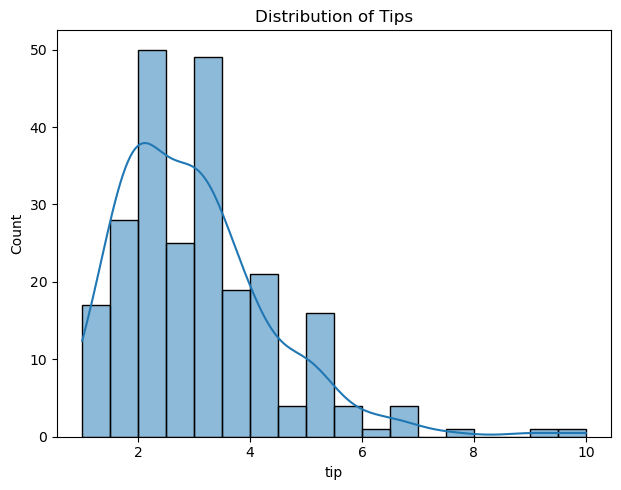

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of tips
plt.figure(figsize=(12, 5))

# Distribution of tips
plt.subplot(1, 2, 1)
sns.histplot(restaurant_data_cleaned['tip'], kde=True)
plt.title('Distribution of Tips')

plt.tight_layout()
plt.show()

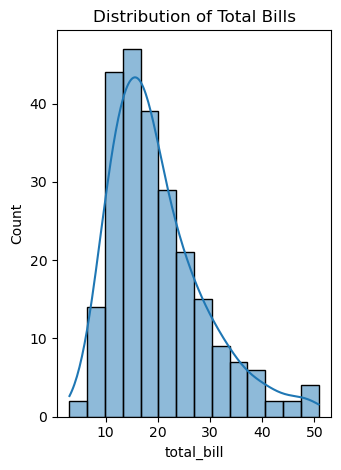

In [56]:
# Distribution of total bills
plt.subplot(1, 2, 2)
sns.histplot(restaurant_data_cleaned['total_bill'], kde=True)
plt.title('Distribution of Total Bills')

plt.tight_layout()
plt.show()

Now plot them on the *same* plot, and add a legend. Hint: use attribute 'label' to give them names, and call legend() on one of the plots to draw the legend

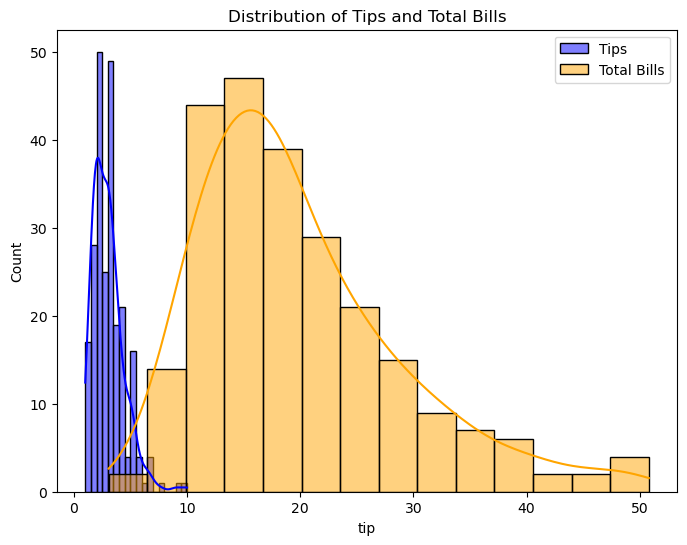

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of tips and total bills on the same graph
plt.figure(figsize=(8, 6))

# Distribution of tips
sns.histplot(restaurant_data_cleaned['tip'], kde=True, label='Tips', color='blue')

# Distribution of total bills
sns.histplot(restaurant_data_cleaned['total_bill'], kde=True, label='Total Bills', color='orange')

# Add title and legend
plt.title('Distribution of Tips and Total Bills')
plt.legend()

# Show the plot
plt.show()


Do people give different average tips on different days? (Have you calculated this relative to the size of the bill, or just the tip amount?) Hint: boxplot

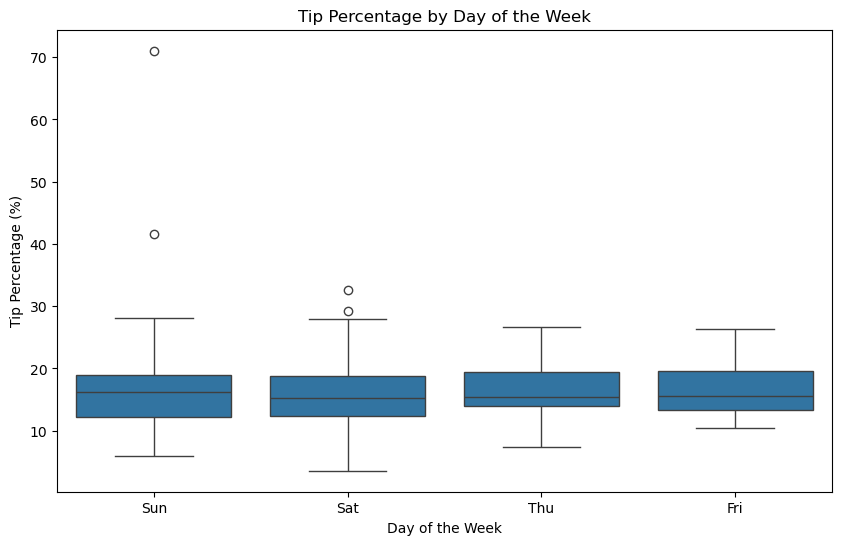

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the tip percentage
restaurant_data_cleaned['tip_percentage'] = (restaurant_data_cleaned['tip'] / restaurant_data_cleaned['total_bill']) * 100

# Plot the boxplot for tip percentage by day
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='tip_percentage', data=restaurant_data_cleaned)

# Add title and labels
plt.title('Tip Percentage by Day of the Week')
plt.ylabel('Tip Percentage (%)')
plt.xlabel('Day of the Week')

# Show the plot
plt.show()


How does the size of the tip relate to the size of the bill? Hint: scatterplot, lmplot

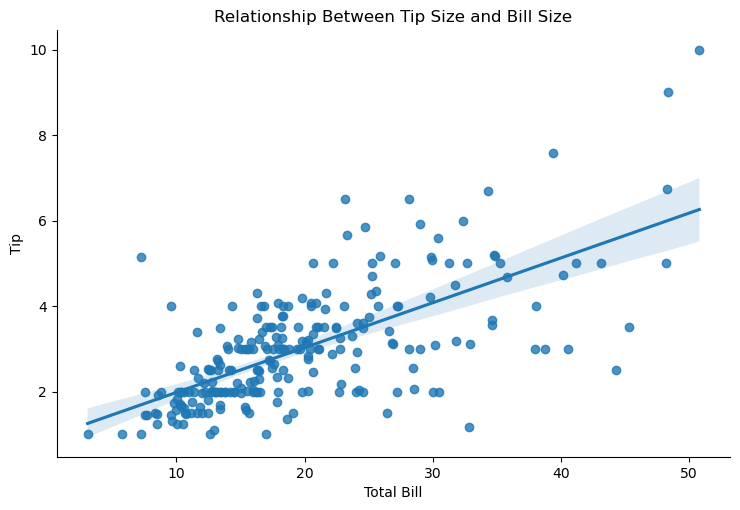

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with regression line (lmplot) to show the relationship between tip and total_bill
sns.lmplot(x='total_bill', y='tip', data=restaurant_data_cleaned, aspect=1.5)

# Add title and labels
plt.title('Relationship Between Tip Size and Bill Size')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

# Show the plot
plt.show()


Does the proportion of the bill given as a tip relate to the number of people eating?

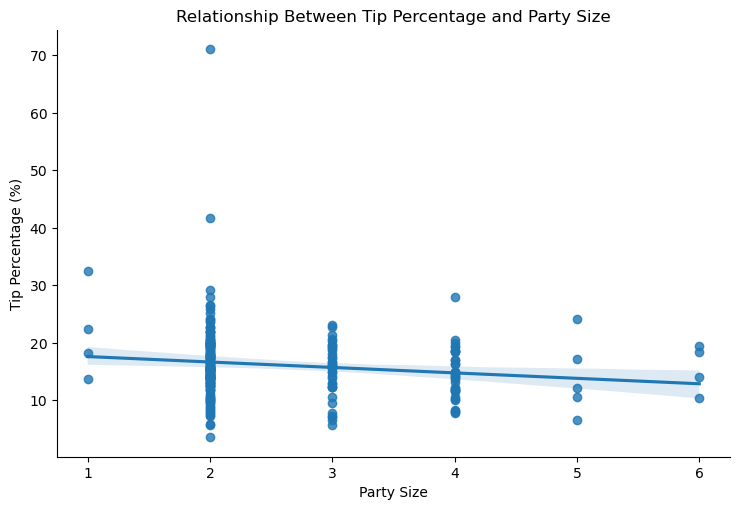

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the tip percentage if not already calculated
restaurant_data_cleaned['tip_percentage'] = (restaurant_data_cleaned['tip'] / restaurant_data_cleaned['total_bill']) * 100

# Scatterplot with regression line to show the relationship between tip percentage and party size
sns.lmplot(x='size', y='tip_percentage', data=restaurant_data_cleaned, aspect=1.5)

# Add title and labels
plt.title('Relationship Between Tip Percentage and Party Size')
plt.xlabel('Party Size')
plt.ylabel('Tip Percentage (%)')

# Show the plot
plt.show()


Bonus Question: Create a boxplot showing total bills and tips for each day next to each other in a different colour.

Hint: use melt (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html) to reshape the data, so that you have new dataset, with a column for the day, a column for the amount, and a type column that says whether it is a total_bill or a tip. Then you can boxplot that, and use the type column to set the color.

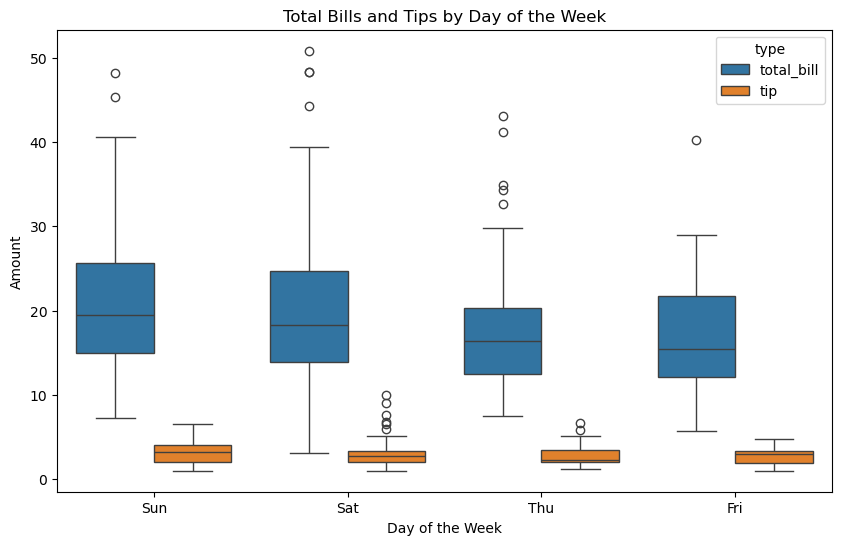

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
restaurant_data_df = pd.read_csv('restaurant_data.csv')

# Clean the data by removing outliers and negative values
restaurant_data_cleaned = restaurant_data_df[
    (restaurant_data_df['total_bill'] > 0) & (restaurant_data_df['total_bill'] < 500) &
    (restaurant_data_df['tip'] > 0) & (restaurant_data_df['tip'] < 100)
]

# Use .loc[] to modify the 'day' column
restaurant_data_cleaned.loc[:, 'day'] = restaurant_data_cleaned['day'].str.strip().replace({
    'Thur': 'Thu', 
    'Thursday': 'Thu'
})

# Melt the data to reshape it for plotting
restaurant_data_melted = pd.melt(restaurant_data_cleaned, 
                                 id_vars=['day'], 
                                 value_vars=['total_bill', 'tip'], 
                                 var_name='type', 
                                 value_name='amount')

# Create a boxplot showing total bills and tips for each day, with different colors for each type
plt.figure(figsize=(10, 6))
sns.boxplot(x='day', y='amount', hue='type', data=restaurant_data_melted)

# Add title and labels
plt.title('Total Bills and Tips by Day of the Week')
plt.ylabel('Amount')
plt.xlabel('Day of the Week')

# Show the plot
plt.show()


# Open Question
Use 2 graphs and associated text to explain something else that you have found in the data. Try to relate it to causes, i.e. explain *why* the data might be this way.

I am analysing smoking habits and tips in the dataset using two graphs and explaining the same. I’m exploring the relationship between smoking status and tip amounts, and how the time of day (lunch vs. dinner) may influence tipping behavior.

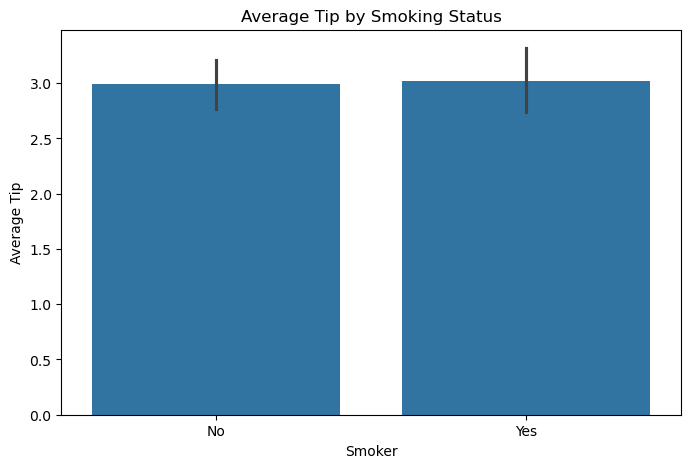

In [62]:
# Calculate the average tip by smoking status
plt.figure(figsize=(8, 5))
sns.barplot(x='smoker', y='tip', data=restaurant_data_cleaned, estimator=lambda x: sum(x) / len(x))

# Add title and labels
plt.title('Average Tip by Smoking Status')
plt.ylabel('Average Tip')
plt.xlabel('Smoker')

# Show the plot
plt.show()


The first graph shows the average tip amount based on whether the customer was a smoker or non-smoker. The data might show that smokers tend to tip slightly less than non-smokers. One possible explanation could be behavioral: smokers might be in a rush to finish their meal and leave (especially in non-smoking environments), affecting their tipping habits. Additionally, cultural and demographic factors associated with smoking might play a role in different tipping behaviors.

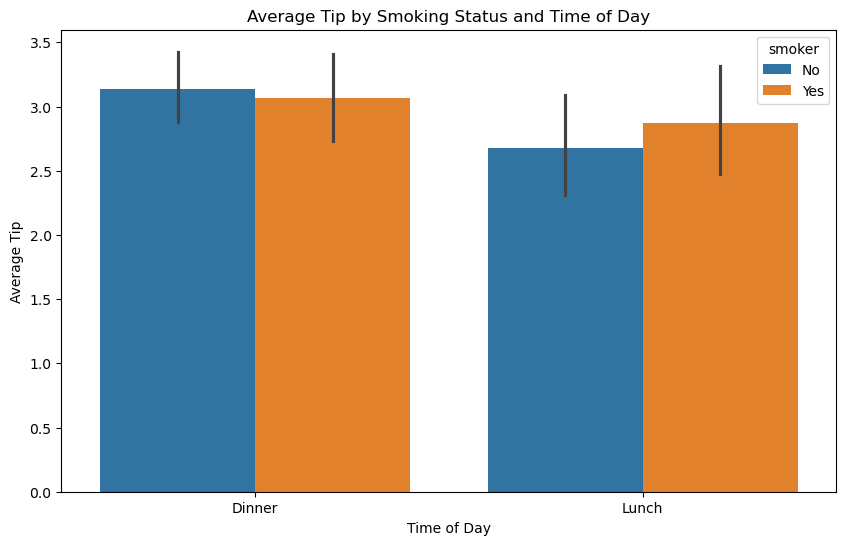

In [63]:
# Plot average tips for smokers and non-smokers by time of day (lunch vs. dinner)
plt.figure(figsize=(10, 6))
sns.barplot(x='time', y='tip', hue='smoker', data=restaurant_data_cleaned)

# Add title and labels
plt.title('Average Tip by Smoking Status and Time of Day')
plt.ylabel('Average Tip')
plt.xlabel('Time of Day')

# Show the plot
plt.show()


The second graph compares the average tip between smokers and non-smokers based on the time of day (lunch vs. dinner). Interestingly, it may show that smokers tend to tip more at dinner time compared to lunch. This could be because dinner meals are typically more expensive, and smokers may be spending more time at dinner, which could lead to more generous tips compared to lunch, where meals are quicker and smaller in scale.

From these graphs, it appears that smokers generally tip less than non-smokers, but this varies based on the time of day. Dinner seems to evoke higher tipping behavior among smokers, potentially because dinner meals are longer and might involve a more relaxed environment, encouraging higher tips.

These findings suggest that behavioral factors, such as the length of the meal and the atmosphere (lunch vs. dinner), may influence tipping habits for smokers versus non-smokers.

# Reflection
Write up to 100 words about your experience and what you have learnt

Through this assignment, I have gained a strong understanding of how to analyse and clean datasets, deal with outliers, and ensure data integrity using assertions. The experience taught me how to visualise relationships between variables using various types of plots, such as boxplots, scatterplots, and bar charts. I also learned how to effectively use `pandas` for data manipulation, including reshaping data with `melt`, and how to apply statistical reasoning to interpret results. This process highlighted the importance of careful data cleaning and thoughtful analysis to uncover meaningful patterns and insights.